<a href="https://colab.research.google.com/github/Dilavarj7/World_Bank_Education_Stats/blob/main/Dilavar_Singh_Team_7_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path='/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Day 1/dat/'
EdStatsCountry_Series_df= pd.read_csv(path + 'EdStatsCountry-Series.csv')
EdStatsCountry_df= pd.read_csv(path + 'EdStatsCountry.csv')
EdStatsData_df= pd.read_csv(path + 'EdStatsData.csv')
EdStatsFootNote_df= pd.read_csv(path + 'EdStatsFootNote.csv')
EdStatsSeries_df= pd.read_csv(path + 'EdStatsSeries.csv')

In [7]:
#deleted unwanted columns
del EdStatsCountry_Series_df['Unnamed: 3']
del EdStatsCountry_df['Unnamed: 31']
del EdStatsData_df['Unnamed: 69']
del EdStatsFootNote_df['Unnamed: 4']
EdStatsSeries_df.drop(['Unit of measure','Notes from original source','Related source links','Other web links','Related indicators','License Type','Unnamed: 20'], axis=1, inplace=True)

1.Analysis and visualization for **EdStatsCountry_Series** DataFrame !.

In [8]:
EdStatsCountry_Series_df.head(5)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


In [16]:
EdStatsCountry_Series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


In [23]:
EdStatsCountry_Series_df['DESCRIPTION'][0]

'Data sources : United Nations World Population Prospects'

In [12]:
EdStatsCountry_Series_df['SeriesCode'].nunique()

21

In [13]:
EdStatsCountry_Series_df['CountryCode'].nunique()

211

In [15]:
EdStatsCountry_Series_df['DESCRIPTION'].nunique()

97

In [20]:
graph_btw_series_code_and_description=EdStatsCountry_Series_df.groupby('SeriesCode')['DESCRIPTION'].count()
graph_btw_series_code_and_description
#this is basically same as below one-So we need to draw the graph for any one of them.

SeriesCode
NY.GDP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GNP.PCAP.CD         6
NY.GNP.PCAP.PP.CD     19
SP.POP.0014.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.TO         4
SP.POP.0014.TO.ZS     13
SP.POP.1564.FE.IN      4
SP.POP.1564.MA.IN      4
SP.POP.1564.TO         4
SP.POP.1564.TO.ZS     13
SP.POP.GROW          211
SP.POP.TOTL          211
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
Name: DESCRIPTION, dtype: int64

In [21]:
EdStatsCountry_Series_plot_graph_of_series_code=EdStatsCountry_Series_df['SeriesCode'].value_counts()
EdStatsCountry_Series_plot_graph_of_series_code 

SP.POP.GROW          211
SP.POP.TOTL          211
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
SP.POP.1564.TO.ZS     13
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.FE.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.0014.MA.IN      4
SP.POP.1564.MA.IN      4
SP.POP.0014.FE.IN      4
Name: SeriesCode, dtype: int64

Text(0.5, 0, 'Series Code')

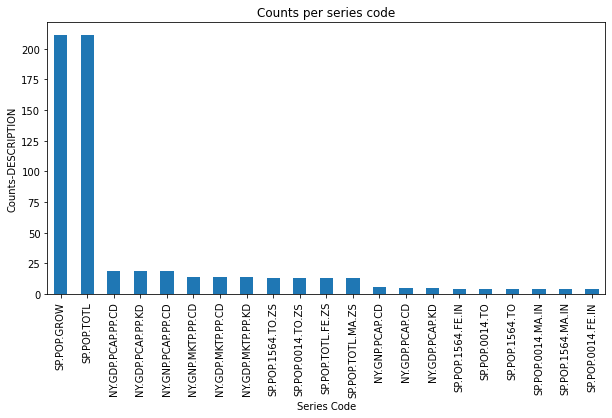

In [22]:
plt.rcParams['figure.figsize'] = (10, 5)
EdStatsCountry_Series_plot_graph_of_series_code.plot(kind='bar')

plt.title('Counts per series code')
plt.ylabel('Counts-DESCRIPTION')
plt.xlabel('Series Code')

2. Analysis for our 2nd DataFrame that is **EdStatsCountry_df**.

In [ ]:
EdStatsCountry_df.head(1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN


In [ ]:
EdStatsCountry_df.dropna(subset=['Region'], inplace=True)

In [30]:
EdStatsCountry_df=EdStatsCountry_df.reset_index()

In [31]:
EdStatsCountry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   index                                              214 non-null    int64  
 1   Country Code                                       214 non-null    object 
 2   Short Name                                         214 non-null    object 
 3   Table Name                                         214 non-null    object 
 4   Long Name                                          214 non-null    object 
 5   2-alpha code                                       211 non-null    object 
 6   Currency Unit                                      214 non-null    object 
 7   Special Notes                                      120 non-null    object 
 8   Region                                             214 non-null    object 
 9   Income Gro

In [32]:
EdStatsCountry_df['Region'].nunique()

7

In [38]:
country_code_value_count_per_region=EdStatsCountry_df.groupby('Region')['Country Code'].count()
country_code_value_count_per_region

Region
East Asia & Pacific           36
Europe & Central Asia         57
Latin America & Caribbean     41
Middle East & North Africa    21
North America                  3
South Asia                     8
Sub-Saharan Africa            48
Name: Country Code, dtype: int64

Text(0.5, 0, 'Region')

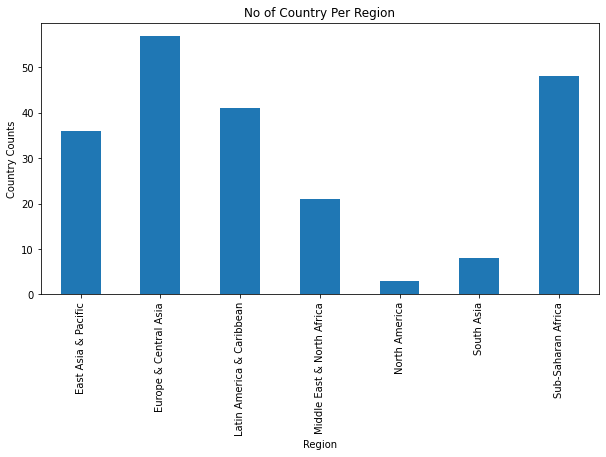

In [41]:
country_code_value_count_per_region.plot(kind='bar')

plt.title('No of Country Per Region')
plt.ylabel('Country Counts')
plt.xlabel('Region')

In [43]:
value_count_for_income_group=EdStatsCountry_df['Income Group'].value_counts()
value_count_for_income_group

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

Text(0.5, 0, 'Income Group')

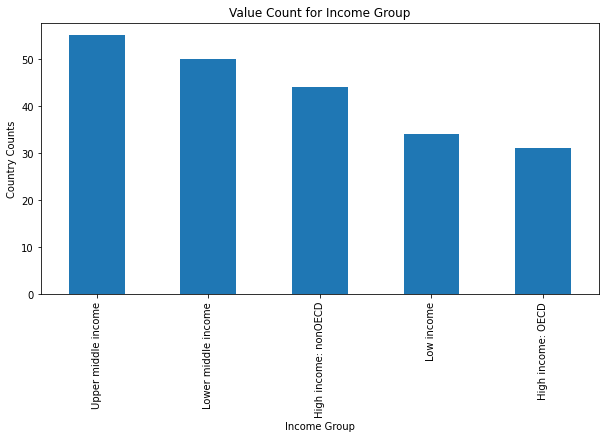

In [44]:
value_count_for_income_group.plot(kind='bar')

plt.title('Value Count for Income Group')
plt.ylabel('Country Counts')
plt.xlabel('Income Group')

3.Data Analysis for our most important DataFrame which has information about Country name and Indicator code...**EdStatsData_df**.

In [87]:
EdStatsData_df.groupby('Country Name')['Indicator Name'].count()

Country Name
Afghanistan           3665
Albania               3665
Algeria               3665
American Samoa        3665
Andorra               3665
                      ... 
West Bank and Gaza    3665
World                 3665
Yemen, Rep.           3665
Zambia                3665
Zimbabwe              3665
Name: Indicator Name, Length: 242, dtype: int64

In [95]:
EdStatsData_df.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df1=EdStatsData_df

In [109]:
#country_list=list(EdStatsData_df[(EdStatsData_df['Country Name'] =='Arab World')]['Country Name'])
#Indicator_code_list=list(EdStatsData_df[(EdStatsData_df['Country Name'] =='Arab World')]['Indicator Code'])
#country_indicator_dict=dict(zip(Indicator_code_list,country_list))

In [110]:
column_lst=list(df1.columns)
df1=df1.drop([column for column in column_lst if ((column !='2010') & (column !='2011') 
& (column !='2012') & (column !='2013') & (column !='2014') & (column !='Country Name') 
& (column !='Country Code') & (column !='Indicator Name') & (column !='Indicator Code'))], axis=1)

In [113]:
df1.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN


In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   2010            242442 non-null  float64
 5   2011            146012 non-null  float64
 6   2012            147264 non-null  float64
 7   2013            137509 non-null  float64
 8   2014            113789 non-null  float64
dtypes: float64(5), object(4)
memory usage: 60.9+ MB


In [115]:
def get_median(year1,year2,year3,year4,year5):
    lst=[]
    lst.append(year1)
    lst.append(year2)
    lst.append(year3)
    lst.append(year4)
    lst.append(year5)
    year_value_series = pd.Series(lst)
    result=year_value_series.median()
    return result


In [116]:
df1['Median Value']=df1.apply(lambda x : get_median(x['2010'],x['2011'],x['2012'],x['2013'],x['2014']), axis=1, result_type='expand')

In [177]:
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,Median Value
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,85.211998,85.245140,86.101669,85.511940,85.320152,85.320152
1,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,82.871651,82.861389,84.401413,83.914032,83.820831,83.820831
2,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.947620,0.946700,0.962080,0.964090,0.966200,0.962080
3,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,87.452583,87.526520,87.728172,87.039879,86.753387,87.452583
4,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,76.197044,76.474968,77.319366,76.566711,76.620567,76.566711


In [149]:
df1.dropna(subset = ['Median Value'], inplace=True)
df1=df1.reset_index()
del df1['index']

In [175]:
df2=df1

In [176]:
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,Median Value
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,85.211998,85.245140,86.101669,85.511940,85.320152,85.320152
1,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,82.871651,82.861389,84.401413,83.914032,83.820831,83.820831
2,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.947620,0.946700,0.962080,0.964090,0.966200,0.962080
3,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,87.452583,87.526520,87.728172,87.039879,86.753387,87.452583
4,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,76.197044,76.474968,77.319366,76.566711,76.620567,76.566711


###<u> Writing a CSV file in the location </u>

In [119]:
df1.to_csv(path +'output_EdStatsData_df.csv')

###<u> Continue..... </u>

4.Analysis for our 4th DataFrame that is **EdStatsFootNote_df**.

In [8]:
EdStatsFootNote_df.head()

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


In [9]:
EdStatsFootNote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB


In [10]:
year_vs_series_code=EdStatsFootNote_df.groupby('Year')['SeriesCode'].count()

Text(0.5, 0, 'Year')

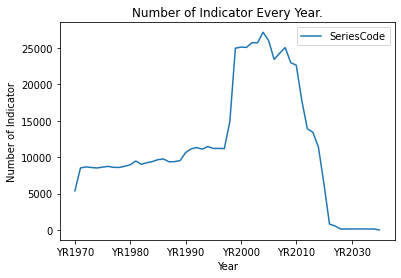

In [11]:
year_vs_series_code.plot(legend=True)
plt.title('Number of Indicator Every Year.')
plt.ylabel('Number of Indicator')
plt.xlabel('Year')

In [12]:
df3=EdStatsFootNote_df[(EdStatsFootNote_df['Year']=='YR2010') | (EdStatsFootNote_df['Year']=='YR2011') | (EdStatsFootNote_df['Year']=='YR2012') 
| (EdStatsFootNote_df['Year']=='YR2013') | (EdStatsFootNote_df['Year']=='YR2014') ]
df3=df3.reset_index()

In [13]:
del df3['index']

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79031 entries, 0 to 79030
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  79031 non-null  object
 1   SeriesCode   79031 non-null  object
 2   Year         79031 non-null  object
 3   DESCRIPTION  79031 non-null  object
dtypes: object(4)
memory usage: 2.4+ MB


In [19]:
df3.head()

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.ADT.1524.LT.FE.ZS,YR2010,Country data
1,ABW,SE.ADT.1524.LT.FM.ZS,YR2010,Country data
2,ABW,SE.ADT.1524.LT.MA.ZS,YR2010,Country data
3,ABW,SE.ADT.1524.LT.ZS,YR2010,Country data
4,ABW,SE.ADT.LITR.FE.ZS,YR2010,Country data


In [34]:
findtop20_series_code=pd.DataFrame(df3['SeriesCode'].value_counts())

In [35]:
findtop20_series_code=findtop20_series_code.rename(columns={"SeriesCode": "Counts"})
findtop20_series_code=findtop20_series_code.iloc[0:20]

In [36]:
findtop20_series_code

,Counts
SH.DYN.MORT,1050
SH.DYN.AIDS.ZS,660
SE.PRM.AGES,609
SE.PRM.DURS,609
SE.SEC.AGES,597
SE.SEC.DURS,597
SE.SEC.ENRL.TC.ZS,593
UIS.OE.56.40510,592
SE.TOT.ENRR,588
UIS.GER.1T6.F,570


In [40]:
top_indicator_code_dict=dict(zip(list(findtop20_series_code.index),list(findtop20_series_code['Counts'])))
top_indicator_code_dict

{'SE.COM.DURS': 424,
 'SE.PRM.AGES': 609,
 'SE.PRM.DURS': 609,
 'SE.PRM.UNER': 386,
 'SE.SEC.AGES': 597,
 'SE.SEC.DURS': 597,
 'SE.SEC.ENRL.TC.ZS': 593,
 'SE.SEC.PROG.FE.ZS': 482,
 'SE.SEC.PROG.MA.ZS': 482,
 'SE.SEC.PROG.ZS': 499,
 'SE.TOT.ENRR': 588,
 'SH.DYN.AIDS.ZS': 660,
 'SH.DYN.MORT': 1050,
 'UIS.GER.1T6.F': 570,
 'UIS.GER.1T6.M': 570,
 'UIS.GOER.56': 473,
 'UIS.MS.56.F': 468,
 'UIS.MS.56.T': 550,
 'UIS.OE.56.40510': 592,
 'UIS.OMR.56': 382}

In [186]:
df3['CountryCode'].nunique()

235

In [189]:
counts_of_series_code_per_year=df3.groupby('Year')['SeriesCode'].count()

In [190]:
counts_of_series_code_per_year

Year
YR2010    22598
YR2011    17760
YR2012    13890
YR2013    13405
YR2014    11378
Name: SeriesCode, dtype: int64

Text(0.5, 0, 'Year')

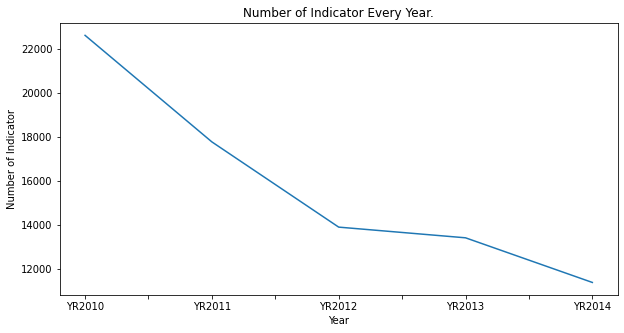

In [197]:
counts_of_series_code_per_year.plot()
plt.title('Number of Indicator Every Year.')
plt.ylabel('Number of Indicator')
plt.xlabel('Year')

In [198]:
df3.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.ADT.1524.LT.FE.ZS,YR2010,Country data
1,ABW,SE.ADT.1524.LT.FM.ZS,YR2010,Country data
2,ABW,SE.ADT.1524.LT.MA.ZS,YR2010,Country data


In [206]:
no_of_indicator_per_country=df3.groupby('CountryCode')['SeriesCode'].count()

Text(0.5, 0, 'CountryCode')

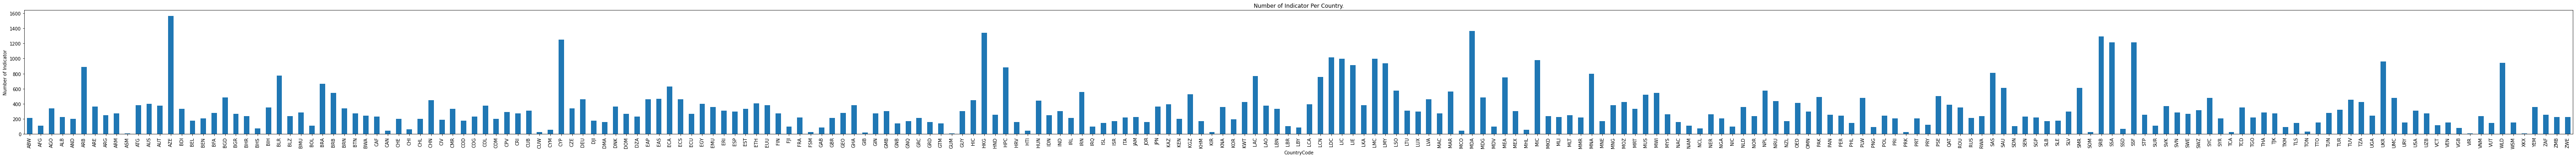

In [213]:
plt.rcParams['figure.figsize'] = (100, 5)
no_of_indicator_per_country.plot(kind='bar')
plt.title('Number of Indicator Per Country.')
plt.ylabel('Number of Indicator')
plt.xlabel('CountryCode')

5. Analysis of **EdStatsSeries_df** DataFrame.

In [215]:
EdStatsSeries_df.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN


In [230]:
EdStatsSeries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Series Code                          3665 non-null   object
 1   Topic                                3665 non-null   object
 2   Indicator Name                       3665 non-null   object
 3   Short definition                     2156 non-null   object
 4   Long definition                      3665 non-null   object
 5   Periodicity                          99 non-null     object
 6   Base Period                          314 non-null    object
 7   Other notes                          552 non-null    object
 8   Aggregation method                   47 non-null     object
 9   Limitations and exceptions           14 non-null     object
 10  General comments                     14 non-null     object
 11  Source                               3665 n

In [216]:
df4=EdStatsSeries_df

In [233]:
df4['Topic'].nunique()

37

In [228]:
no_of_series_code_per_topic=df4.groupby('Topic')['Series Code'].count()

Text(0.5, 0, 'Topic')

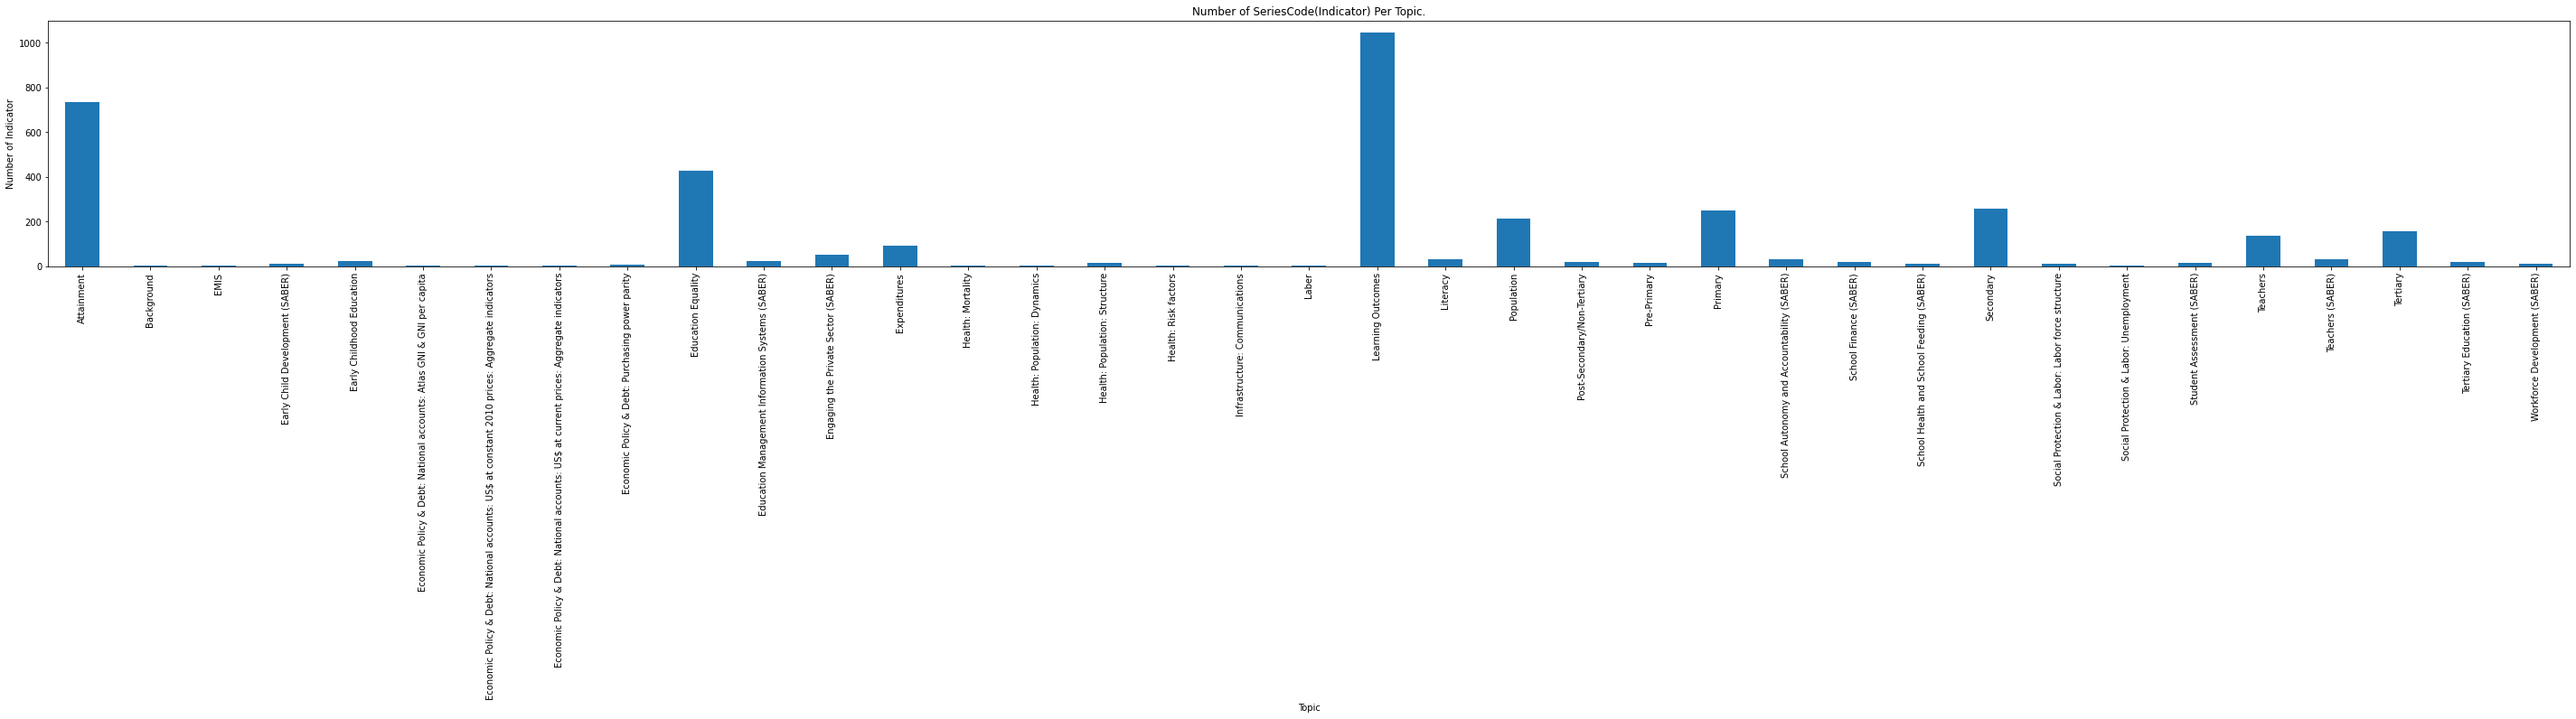

In [229]:
plt.rcParams['figure.figsize'] = (50, 5)
no_of_series_code_per_topic.plot(kind='bar')
plt.title('Number of SeriesCode(Indicator) Per Topic.')
plt.ylabel('Number of Indicator')
plt.xlabel('Topic')

In [236]:
# Attainment series
#att_ser,att_iname=zip(*df4[df4['Topic']=='Attainment'][['Series Code','Indicator Name']].values)
#dictt=dict(zip(att_ser,att_iname))

Text(0.5, 0, 'Base Period')

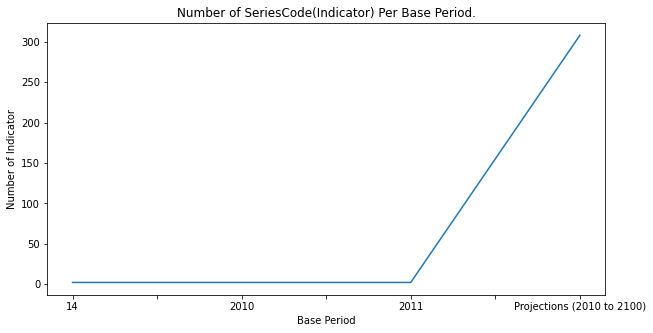

In [249]:
#plotline 
plt.rcParams['figure.figsize'] = (10, 5)
df4.groupby('Base Period')['Series Code'].count().plot()
plt.title('Number of SeriesCode(Indicator) Per Base Period.')
plt.ylabel('Number of Indicator')
plt.xlabel('Base Period')

Text(0.5, 0, 'Base Period')

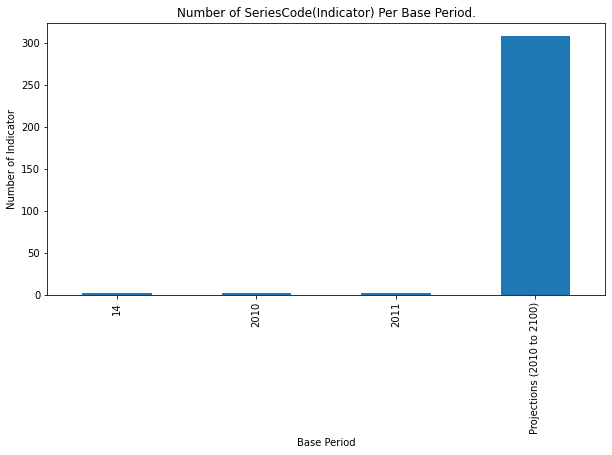

In [250]:
#bar plot 
plt.rcParams['figure.figsize'] = (10, 5)
df4.groupby('Base Period')['Series Code'].count().plot(kind='bar')
plt.title('Number of SeriesCode(Indicator) Per Base Period.')
plt.ylabel('Number of Indicator')
plt.xlabel('Base Period')